In [9]:
#import mysql.connector

    #mydb = mysql.connector.connect(
    #host="localhost",
    #user="root",
    #password="abc123"
 #)

#mycursor = mydb.cursor()

#mycursor.execute("CREATE BMW dataset")


IndentationError: unexpected indent (1678655413.py, line 3)

In [571]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy import percentile



In [572]:
bmw = pd.read_csv("bmw.csv")
bmw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [573]:
bmw.info

<bound method DataFrame.info of            model  year  price transmission  mileage fuelType  tax   mpg  \
0       5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1       6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2       5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3       1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4       7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   
...          ...   ...    ...          ...      ...      ...  ...   ...   
10776         X3  2016  19000    Automatic    40818   Diesel  150  54.3   
10777   5 Series  2016  14600    Automatic    42947   Diesel  125  60.1   
10778   3 Series  2017  13100       Manual    25468   Petrol  200  42.8   
10779   1 Series  2014   9930    Automatic    45000   Diesel   30  64.2   
10780         X1  2017  15981    Automatic    59432   Diesel  125  57.6   

       engineSize  
0             2.0  
1             2.0  
2      

In [574]:
#Renaming of column mileage to miles 
df = bmw.rename(columns={'mileage': 'Miles'})
df

,model,year,price,transmission,Miles,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [575]:
df["engineSize"]=df["engineSize"].replace(0,np.nan)  #As we can see . There are no null values present in the data set. But there are some problem of outliers! Also the value of tax and engine size is 0 . Let's check that also!
df["tax"]=df["tax"].replace(0,np.nan)

In [576]:
df.isna().sum()

model             0
year              0
price             0
transmission      0
Miles             0
fuelType          0
tax             340
mpg               0
engineSize       47
dtype: int64

In [577]:
#Changing those values to null and removing them
df.dropna( inplace = True)

In [578]:
#Removing of duplicate values 
duplicate = df.duplicated().sum()
duplicate

117

In [579]:
df.drop_duplicates(inplace=True)

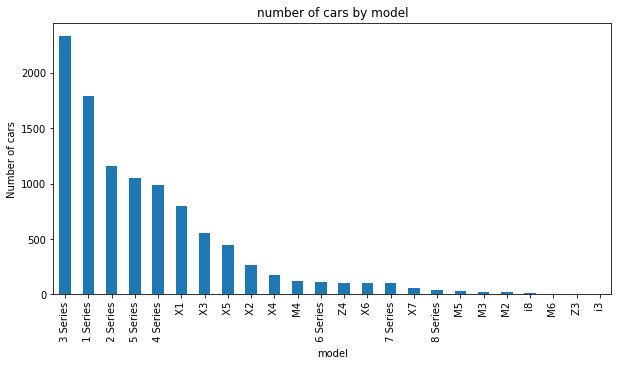

In [580]:
#Plotting an Histogram
df.model.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('number of cars by model')
plt.ylabel('Number of cars')
plt.xlabel('model')
plt.show()

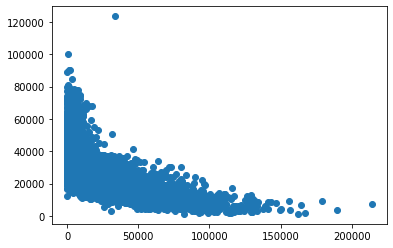

In [581]:
#Scatter plot between Miles and Price
plt.scatter(df['Miles'], df['price'])

As we can see there is no linear relationship between the dependent and independant variable

,year,price,Miles,tax,mpg,engineSize
year,1.000000,0.624533,-0.781890,-0.008705,-0.071222,-0.046142
price,0.624533,1.000000,-0.604921,0.234313,-0.327140,0.462230
Miles,-0.781890,-0.604921,1.000000,-0.133887,0.156089,0.016724
tax,-0.008705,0.234313,-0.133887,1.000000,-0.393863,0.406275
mpg,-0.071222,-0.327140,0.156089,-0.393863,1.000000,-0.380073
engineSize,-0.046142,0.462230,0.016724,0.406275,-0.380073,1.000000


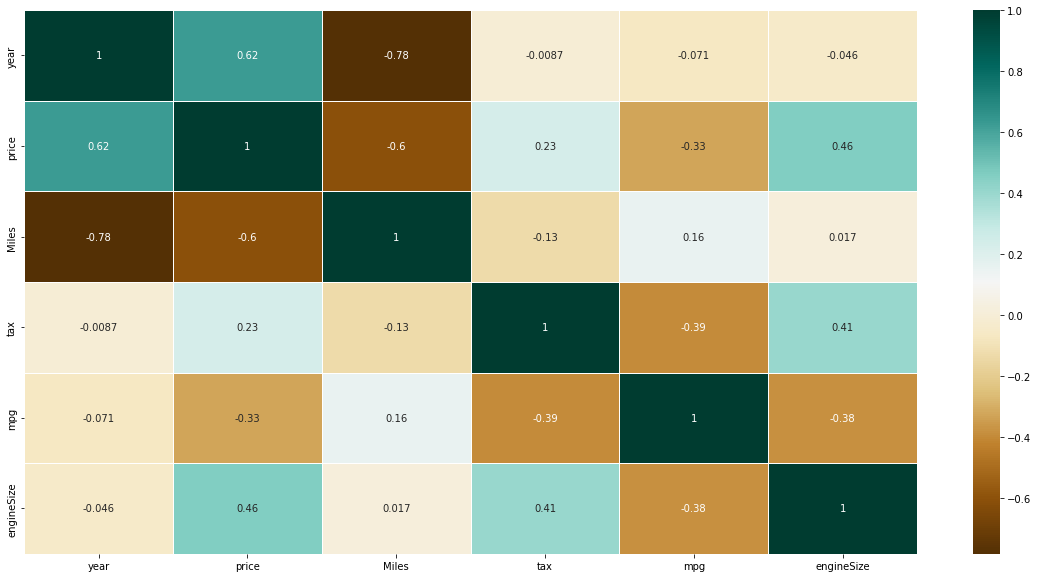

In [582]:
#Finding the relation between the variables
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(correlation,cmap='BrBG', linewidth = 0.5, annot = True)
correlation

In [583]:
#As we know that the Machine learning model takes only numerical values. so we will change some categorical values to numerical values
df["transmission"]=df["transmission"].map({'Semi-Auto':0,'Automatic':1,'Manual':2})
df["fuelType"]=df["fuelType"].map({'Diesel':0,'Petrol':1,'Hybrid':2,'Other':3,'Electric':4})
df

,model,year,price,transmission,Miles,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,1,67068,0,125.0,57.6,2.0
1,6 Series,2018,27000,1,14827,1,145.0,42.8,2.0
2,5 Series,2016,16000,1,62794,0,160.0,51.4,3.0
3,1 Series,2017,12750,1,26676,0,145.0,72.4,1.5
4,7 Series,2014,14500,1,39554,0,160.0,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,1,40818,0,150.0,54.3,2.0
10777,5 Series,2016,14600,1,42947,0,125.0,60.1,2.0
10778,3 Series,2017,13100,2,25468,1,200.0,42.8,2.0
10779,1 Series,2014,9930,1,45000,0,30.0,64.2,2.0


In [584]:
dum=pd.get_dummies(df['model'],drop_first=True)
dum2=pd.DataFrame(dum,columns=dum.columns)

In [585]:
df.tail()

,model,year,price,transmission,Miles,fuelType,tax,mpg,engineSize
10776,X3,2016,19000,1,40818,0,150.0,54.3,2.0
10777,5 Series,2016,14600,1,42947,0,125.0,60.1,2.0
10778,3 Series,2017,13100,2,25468,1,200.0,42.8,2.0
10779,1 Series,2014,9930,1,45000,0,30.0,64.2,2.0
10780,X1,2017,15981,1,59432,0,125.0,57.6,2.0


In [586]:
#Drop model from df
#dum=pd.get_dummies(bmw["model"],drop_first=True)
#dum2=pd.DataFrame(dum,columns=dum.columns)
#df=pd.concat([bmw,dum2],axis=1)
df.drop("model",axis=1,inplace=True)

#### We know that in the regression analysis the response variable should be normally distributed to get better prediction results.Also it is one of the assumption that we have to follow.From the Eda we get to know that there are so many outliers present in the daata set . Let's handle those also! We will use Log Transformation

In [587]:
# rounding off the observations.
df["price"]=round(np.log(df["price"]))
df["year"]=round(np.log(df["year"]))
df["Miles"]=round(np.log(df["Miles"]))
df["tax"]=round(np.log(df["tax"]))
df["mpg"]=round(np.log(df["mpg"]))
df["engineSize"]=round(np.log(df["engineSize"]))

In [588]:
df

,year,price,transmission,Miles,fuelType,tax,mpg,engineSize
0,8.0,9.0,1,11.0,0,5.0,4.0,1.0
1,8.0,10.0,1,10.0,1,5.0,4.0,1.0
2,8.0,10.0,1,11.0,0,5.0,4.0,1.0
3,8.0,9.0,1,10.0,0,5.0,4.0,0.0
4,8.0,10.0,1,11.0,0,5.0,4.0,1.0
...,...,...,...,...,...,...,...,...
10776,8.0,10.0,1,11.0,0,5.0,4.0,1.0
10777,8.0,10.0,1,11.0,0,5.0,4.0,1.0
10778,8.0,9.0,2,10.0,1,5.0,4.0,1.0
10779,8.0,9.0,1,11.0,0,3.0,4.0,1.0


In [589]:
X=df.drop("price",axis=1)
y=df["price"]
df

,year,price,transmission,Miles,fuelType,tax,mpg,engineSize
0,8.0,9.0,1,11.0,0,5.0,4.0,1.0
1,8.0,10.0,1,10.0,1,5.0,4.0,1.0
2,8.0,10.0,1,11.0,0,5.0,4.0,1.0
3,8.0,9.0,1,10.0,0,5.0,4.0,0.0
4,8.0,10.0,1,11.0,0,5.0,4.0,1.0
...,...,...,...,...,...,...,...,...
10776,8.0,10.0,1,11.0,0,5.0,4.0,1.0
10777,8.0,10.0,1,11.0,0,5.0,4.0,1.0
10778,8.0,9.0,2,10.0,1,5.0,4.0,1.0
10779,8.0,9.0,1,11.0,0,3.0,4.0,1.0


In [590]:
X = sklearn.preprocessing.scale(X)

Making an model

In [591]:
#Training and Testing of data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 41)

In [592]:
#Performing Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
y_pred

array([10.1314665 , 10.1314665 , 10.72612458, ..., 10.22201673,
       10.03077895,  9.91702688])

In [593]:
#Accuracy score
model.score(X_test,y_test)

0.3308469448521152

In [594]:
#Mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_test,y_pred)
mean_squared_error

0.19569759073596474

In [595]:
#Performing RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(X_train,y_train)

y_pred=model1.predict(X_test)
y_pred


array([10.22084972, 10.22084972, 10.12553828, ..., 10.20753328,
       10.17616727, 10.        ])

In [596]:
#Accuracy score
model1.score(X_test,y_test)

0.4757838739443172

In [597]:
#Mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_test,y_pred)
mean_squared_error

0.15330996713654052

In [598]:
#performing SVR
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model2 = np.random.RandomState(0)
model2= make_pipeline(StandardScaler(),SVR(C = 1.0,epsilon = 0.2))
model2.fit(X_train,y_train)

y_pred=model2.predict(X_test)
y_pred


array([10.19977024, 10.19977024, 10.19991235, ..., 10.20008585,
       10.19286546, 10.16978013])

In [599]:
#Accuracy score
model2.score(X_test,y_test)

0.45121838739755826

In [600]:
#Mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_test,y_pred)
mean_squared_error

0.16049428243701394